# MNIST from scratch

This notebook walks through an example of training a TensorFlow model to do digit classification using the [MNIST data set](http://yann.lecun.com/exdb/mnist/). MNIST is a labeled set of images of handwritten digits.

An example follows.

## Read GIF

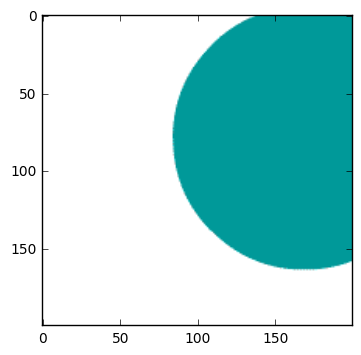

In [95]:
from scipy import misc
filename="/notebooks/synthetic/data001/move003_0007.gif"
#SciPy image sp_img
sp_img=misc.imread(filename)

import matplotlib.pyplot as plt
plt.imshow(sp_img)
plt.show()


In [115]:
sp_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0, 153, 153],
        [102, 204, 204],
        [204, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0, 153, 153],
        [  0, 153, 153],
        [  0, 153, 153]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0, 153, 153],
        [  0, 153, 153],
        [  0, 153, 153]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

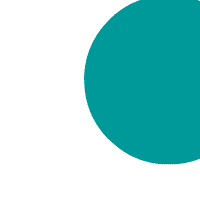

In [4]:
import numpy as np
from PIL import Image
# PIL image pil_img
pil_img=Image.open(filename)
pil_img

## Compare <span style="color:#b0b">SciPy-type</span> and <span style="color:#07d">PIL-type</span> images
---


<span style="color:#b0b">SciPy images</span> opened with misc.imread(filename)

<span style="color:#07d">PIL images</span> opened with Image.open(filename)

<span style="color:#07d">PIL images</span> are of type GifImageFile

In [108]:
print(pil_img)
#print(sp_img)  Can be printed!

<PIL.GifImagePlugin.GifImageFile image mode=P size=200x200 at 0x7F37BA4A9C50>


<span style="color:#07d">PIL images</span> converted to array have strange values. One value per pixel.

In [8]:
pil_arr=np.array(pil_img)
print pil_arr

[[215 215 215 ..., 126 170 214]
 [215 215 215 ..., 126 126 126]
 [215 215 215 ..., 126 126 126]
 ..., 
 [215 215 215 ..., 215 215 215]
 [215 215 215 ..., 215 215 215]
 [215 215 215 ..., 215 215 215]]


<span style="color:#b0b">SciPy images</span> have 3 values per pixel.

In [7]:
sp_arr=np.array(sp_img)
#print sp_arr

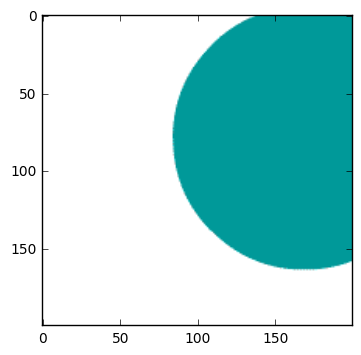

In [113]:
plt.imshow(pil_img) # Both sc_img and pil_img produce save picture
plt.show()

# <span style="color:#07d">PIL images</span>

## Normalisation

In [14]:
pil_max = np.amax(pil_arr)
print pil_max
pil_min = np.amin(pil_arr)
print pil_min

215
126


In [20]:
pil_scaled_arr = (pil_arr - pil_min) / (pil_max - pil_min) - 0.5
print pil_scaled_arr

[[ 0.5  0.5  0.5 ..., -0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5 ..., -0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5 ..., -0.5 -0.5 -0.5]
 ..., 
 [ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]
 [ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]
 [ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]]


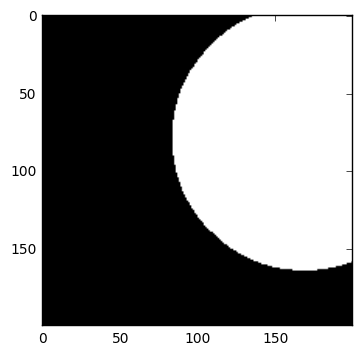

In [21]:
plt.imshow(pil_scaled_arr, cmap=plt.cm.Greys) 
plt.show()

In [25]:
pix=pil_img.load()
print pix[100,150]

215


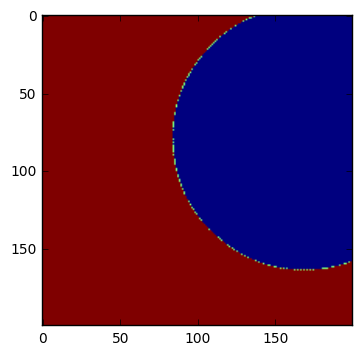

In [80]:
plt.imshow(arr)
plt.show()

## Convert to grey scale

### Array manipulations

In [59]:
arr.shape

(200, 200)

In [60]:
arr

array([[215, 215, 215, ..., 215, 215, 215],
       [215, 215, 215, ..., 215, 215, 215],
       [215, 215, 215, ..., 215, 215, 215],
       ..., 
       [215, 215, 215, ..., 156, 156, 156],
       [215, 215, 215, ..., 156, 156, 156],
       [215, 215, 215, ..., 156, 156, 156]], dtype=uint8)

In [75]:
A = (arr < 215)
B = A.astype(int)
B

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [56]:
m = np.asmatrix(arr)

In [57]:
m

matrix([[215, 215, 215, ..., 215, 215, 215],
        [215, 215, 215, ..., 215, 215, 215],
        [215, 215, 215, ..., 215, 215, 215],
        ..., 
        [215, 215, 215, ..., 156, 156, 156],
        [215, 215, 215, ..., 156, 156, 156],
        [215, 215, 215, ..., 156, 156, 156]], dtype=uint8)

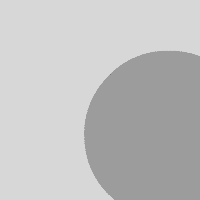

In [32]:
img2=misc.toimage(arr,high=215)
img2